Задание №1:Вариант 26.

In [ ]:
import numpy as np


1)Сначала напишем метод прогонки, который впоследствии пригодится для подсчета значений в узлах.

In [ ]:
def L_solve(L,phi):
  n=len(L)
  x=[]
  x.append(phi[0]/L[0][0])
  for i in range(1,n):
      x.append((phi[i]-L[i][i-1]*x[i-1])/L[i][i])
  return x
def U_solve(U,f):
  n=len(U)
  x=[]
  x.append(f[n-1])
  for i in range(n-2,-1,-1):
      x.append(f[i]-U[i][i+1]*x[n-i-2])
  return x[::-1]
def run_through_solve(A,phi):
   n=len(A)
   L=np.zeros((n,n))
   U=np.zeros((n,n))
   for i in range(n):
     U[i][i]=1
   L[0][0]=A[0][0]
   U[0][1]=A[0][1]/L[0][0]
   for i in range(1,n):
     L[i][i]=A[i][i]-A[i][i-1]*U[i-1][i]
     if i!=n-1:
       U[i][i+1]=A[i][i+1]/L[i][i]
     L[i][i-1]=A[i][i-1]
   return U_solve(U,L_solve(L,phi))



2)Прописать функцию для состаления A и F, и решение +

In [ ]:
def make_A(tau,h,n_x,a):
  M=np.zeros((n_x-1,n_x-1))
  m_ii=1/tau+a/h**2
  b=-a/(2*h**2)
  for i in range(n_x-1):
    M[i][i]=m_ii
    if i!=(n_x-2):
       M[i+1][i]=b
       M[i][i+1]=b
  return M
def solve_next_row(u_j,f,u_l,u_r,n_t,n_x,j,tau,a,h,A):
  phi=[]
  for i in range(1,n_x):
      #phi.append(f(i/n_x,(j)/n_t)-(u_j[i-1]*(-a/(2*h**2))+u_j[i]*(-1/tau+a/h**2)+u_j[i+1]*(-a/(2*h**2))))
      phi.append(f(i/n_x,(j-1/2)/n_t)+u_j[i-1]*(a/(2*h**2))+u_j[i]*(1/tau-a/h**2)+u_j[i+1]*(a/(2*h**2)))
  phi[0]+=u_l*a/(2*h**2)
  phi[-1]+=u_r*a/(2*h**2)
  return run_through_solve(A,phi)
def solve_all_diffur(tau,h,a,f,mu,mu_1,mu_2):
  n_x=int(1/h)
  n_t=int(1/tau)
  A=make_A(tau,h,n_x,a)
  u_0=[mu(i/n_x) for i in range(0,n_x+1)]
  yield u_0
  for j in range(1,n_t+1):
    u_l=mu_1(j/n_t)
    u_r=mu_2(j/n_t)
    u_0=solve_next_row(u_0,f,u_l,u_r,n_t,n_x,j,tau,a,h,A)
    u_0=[u_l]+u_0+[u_r]
    yield u_0




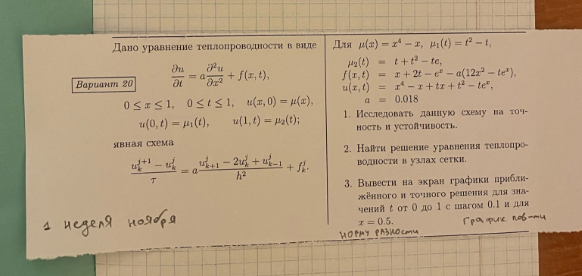

In [ ]:
a=0.025
f=lambda x,t:-9*t**2+6*x*t-a*(-24*x**2+np.e**x)
ddf=lambda x:48*a+np.e**x
mu=lambda x:-2*x**4+np.e**x
mu_1=lambda t:-3*t**3+1
mu_2=lambda t:-2-3*t**3+3*t**2+np.e
for i in list(solve_all_diffur(0.1,0.1,a,f,mu,mu_1,mu_2)):
  print(i)

[1.0, 1.1049709180756477, 1.2182027581601698, 1.333658807576003, 1.4406246976412704, 1.5237212707001282, 1.5629188003905088, 1.5335527074704762, 1.4063409284924673, 1.1474031111569494, 0.7182818284590451]
[0.997, 1.1055573500393203, 1.2218486521406597, 1.3403109519178127, 1.4502777419315298, 1.5363746972265597, 1.5785725335155236, 1.5522062334228321, 1.427988881156376, 1.171992007128549, 0.745281828459045]
[0.976, 1.0940362152417282, 1.219472818402215, 1.3469598091425345, 1.4659303435955886, 1.5610280200326285, 1.612225823338286, 1.5948564576155095, 1.479614991757329, 1.232472751037995, 0.8142818284590452]
[0.919, 1.0524451812658941, 1.1930651211678711, 1.3356011507784682, 1.4695815459153228, 1.5796809115788908, 1.6458777081579425, 1.6434991283304892, 1.5432090685076907, 1.310883216118794, 0.9072818284590451]
[0.8079999999999999, 0.9628057372913925, 1.1246245825122012, 1.2882310839422357, 1.4432298613076744, 1.5743326852380404, 1.6615266929401202, 1.6801303313139384, 1.600770127700107,

In [ ]:
u=lambda t,x:-2*x**4-3*t**3+3*t**2*x+np.e**x
u(0,0.1)

1.1049709180756477

Test by different epsilon:

In [ ]:
import pandas as pd
def compare_cheb_norm(tau,h):
  U=list(solve_all_diffur(tau,h,a,f,mu,mu_1,mu_2))
  mm=-1000000000000
  for i in range(len(U)):
    for j in range(len(U[i])):
      m=abs(U[i][j]-u(i*tau,j*h))
      if m>mm:
         mm=m
  return mm

b=[0.1,0.01,0.001]
A=[]
for j in b:
  B=[]
  for i in b:
     B.append(compare_cheb_norm(i,j))
  A.append(B)

Table=pd.DataFrame({"tau\h":["0.1","0.01","0.001"],"0.1":A[0],"0.01":A[1],"0.001":A[2]})

In [ ]:
Table

,tau\h,0.1,0.01,0.001
0,0.1,0.008804,0.007428,7.414702e-03
1,0.01,0.001635,0.000089,7.429562e-05
2,0.001,0.001567,0.000017,8.870487e-07


График функции трехмерный и при конкретных t

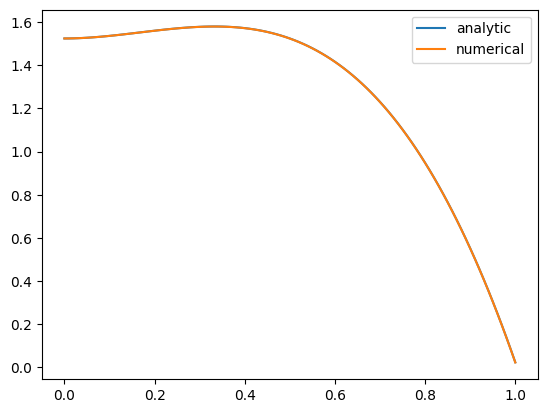

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot( [i/100 for i in range(100+1)],[u(i/100,0.5) for i in range(100+1)],label="analytic")
ax.plot( [i/100 for i in range(100+1)],np.array(list(solve_all_diffur(0.01,0.1,a,f,mu,mu_1,mu_2)))[:,5],label="numerical")
ax.legend()

3-х мерный график

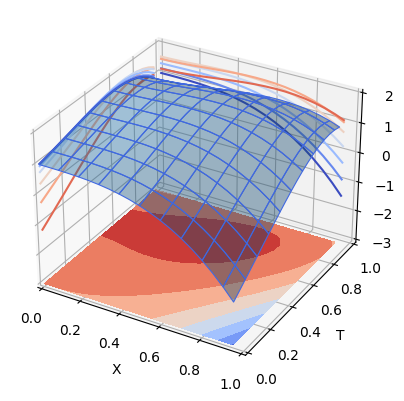

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X = np.arange(0, 1, 0.05)
T = np.arange(0, 1, 0.05)
X, T = np.meshgrid(X, T)
Z =u(X,T)

# Plot the 3D surface
ax.plot_surface(X, T, Z, edgecolor='royalblue', lw=0.8, rstride=2, cstride=2,
                alpha=0.4)



# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contourf(X, T, Z, zdir='z', offset=-3, cmap='coolwarm')
ax.contour(X, T, Z, zdir='x', offset=0, cmap='coolwarm')
ax.contour(X, T, Z, zdir='y', offset=1, cmap='coolwarm')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(-3, 2),
       xlabel='X', ylabel='T', zlabel='Z')

plt.show()